## About Dataset (https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition)

Predict attrition of your valuable employees.

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

'Education'
- 'Below College'
- 'College'
- 'Bachelor'
- 'Master'
- 'Doctor'

EnvironmentSatisfaction
- 'Low'
- 'Medium'
- 'High'
- 'Very High'

JobInvolvement
- 'Low'
- 'Medium'
- 'High'
- 'Very High'

JobSatisfaction
- 'Low'
- 'Medium'
- 'High'
- 'Very High'

PerformanceRating
- 'Low'
- 'Good'
- 'Excellent'
- 'Outstanding'

RelationshipSatisfaction
- 'Low'
- 'Medium'
- 'High'
- 'Very High'

WorkLifeBalance
- 'Bad'
- 'Good'
- 'Better'
- 'Best'

In [448]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [449]:
# import the data
df  = pd.read_csv('C:\\Users\\rosyi\\Desktop\\Data Coding\\Projects\\Personal Projects\\Attrition Employees\\HR Employee Attrition.csv')
# df.to_excel('C:\\Users\\rosyi\\Desktop\\Data Coding\\Projects\\Personal Projects\\Attrition Employees\\HR Employee Attrition.xlsx')

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There isn't any null values in the data, so the data is clean.

## Exploratory Data Analysis (EDA)

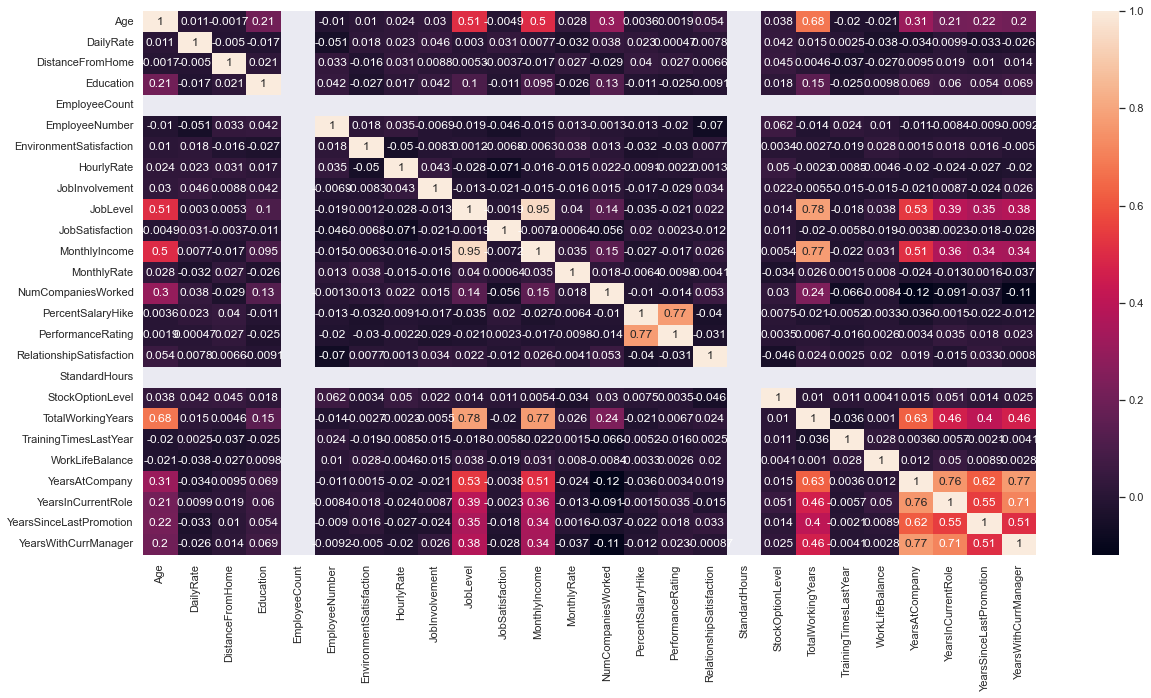

In [451]:
# Create heatmap of correlation

sns.set(rc = {'figure.figsize':(20,10)})
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

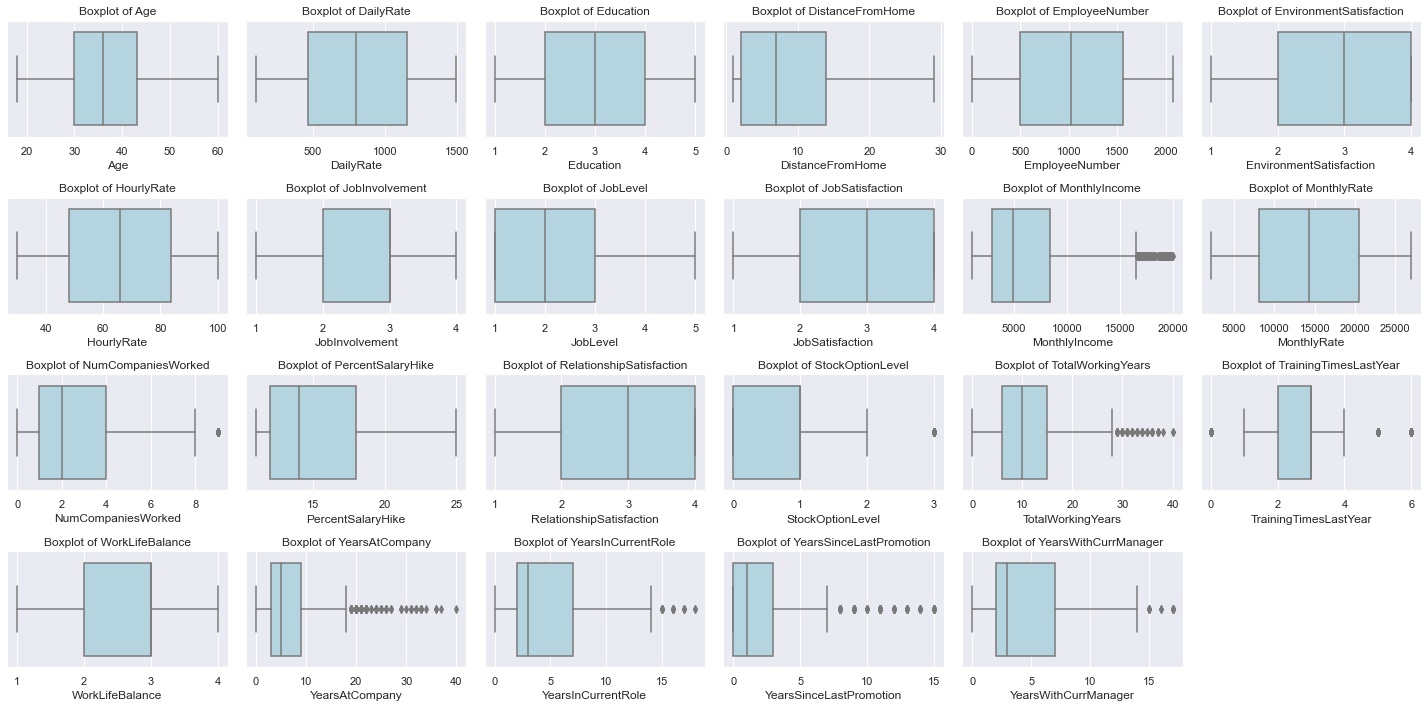

In [452]:
# Create boxplot for every variable

feature = df[['Age','DailyRate','Education','DistanceFromHome','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

plt.figure(figsize=(20,10))
list_of_column=feature.columns

for i in range(len(list_of_column)):
    plt.subplot(4,6,i+1)
    sns.boxplot(x = feature[list_of_column[i]],data=feature,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

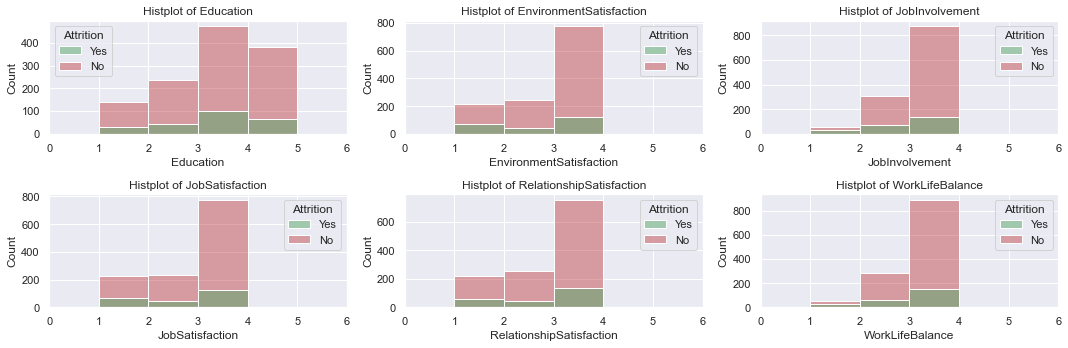

In [453]:
# Graph for every likert variable

var = df[['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']]

plt.figure(figsize=(15,5))
list_of_column=var.columns

for i in range(len(list_of_column)):
    plt.subplot(2,3,i+1)
    sns.histplot(data=df,hue = 'Attrition',x = var[list_of_column[i]], palette=['g', 'r'], binwidth=1)
    plt.title('Histplot of {}'.format(list_of_column[i]))
    plt.xlim(0,6)
    plt.tight_layout()

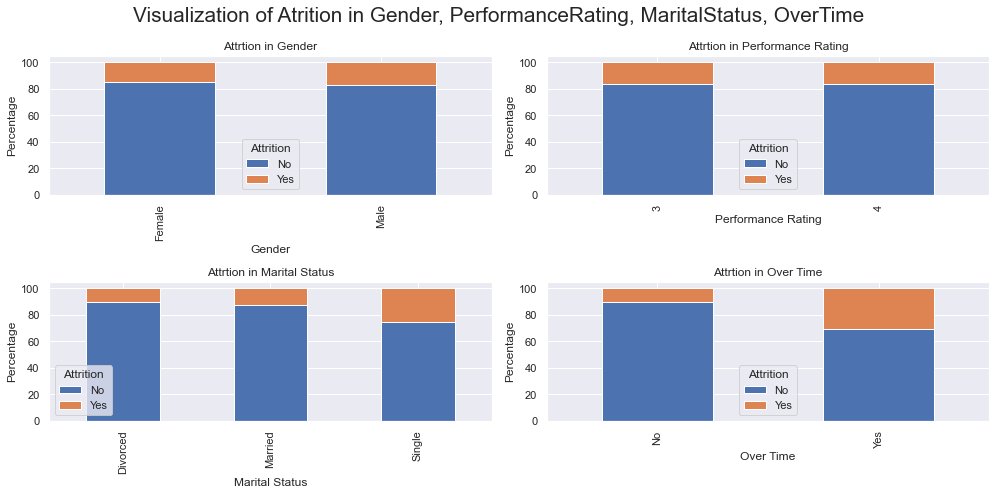

In [454]:
# Crosstab of Atrition in Gender, Performance Rating, Marital Status,and Over Time

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize =(14,7))

pd.crosstab(df['Gender'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax1)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Percentage')
ax1.set_title('Attrtion in Gender')

pd.crosstab(df['PerformanceRating'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax2)
ax2.set_xlabel('Performance Rating')
ax2.set_ylabel('Percentage')
ax2.set_title('Attrtion in Performance Rating')

pd.crosstab(df['MaritalStatus'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax3)
ax3.set_xlabel('Marital Status')
ax3.set_ylabel('Percentage')
ax3.set_title('Attrtion in Marital Status')

pd.crosstab(df['OverTime'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax4)
ax4.set_xlabel('Over Time')
ax4.set_ylabel('Percentage')
ax4.set_title('Attrtion in Over Time')

fig.suptitle('Visualization of Atrition in Gender, PerformanceRating, MaritalStatus, OverTime', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

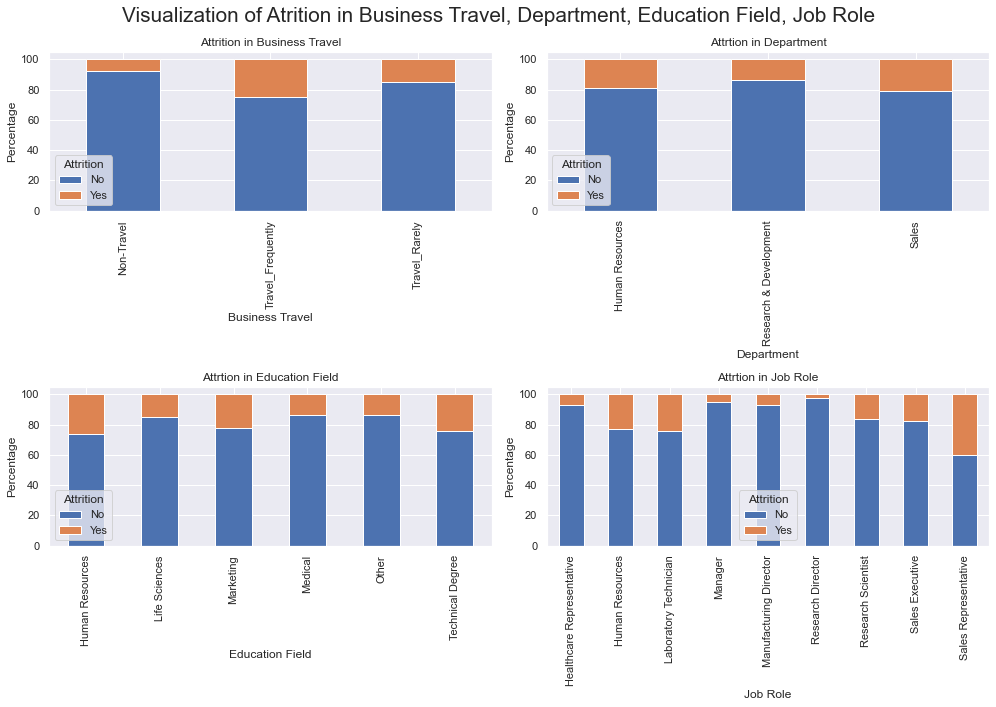

In [455]:
# Crosstab of Atrition in Business Travel, Department, Education Field,and Job Role

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize =(14,10))

pd.crosstab(df['BusinessTravel'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax1)
ax1.set_xlabel('Business Travel')
ax1.set_ylabel('Percentage')
ax1.set_title('Attrition in Business Travel')

pd.crosstab(df['Department'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax2)
ax2.set_xlabel('Department')
ax2.set_ylabel('Percentage')
ax2.set_title('Attrtion in Department')

pd.crosstab(df['EducationField'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax3)
ax3.set_xlabel('Education Field')
ax3.set_ylabel('Percentage')
ax3.set_title('Attrtion in Education Field')

pd.crosstab(df['JobRole'], df['Attrition']).apply(lambda x: x*100/x.sum(), axis = 1).plot(kind = 'bar',stacked=True,ax = ax4)
ax4.set_xlabel('Job Role')
ax4.set_ylabel('Percentage')
ax4.set_title('Attrtion in Job Role')

fig.suptitle('Visualization of Atrition in Business Travel, Department, Education Field, Job Role', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

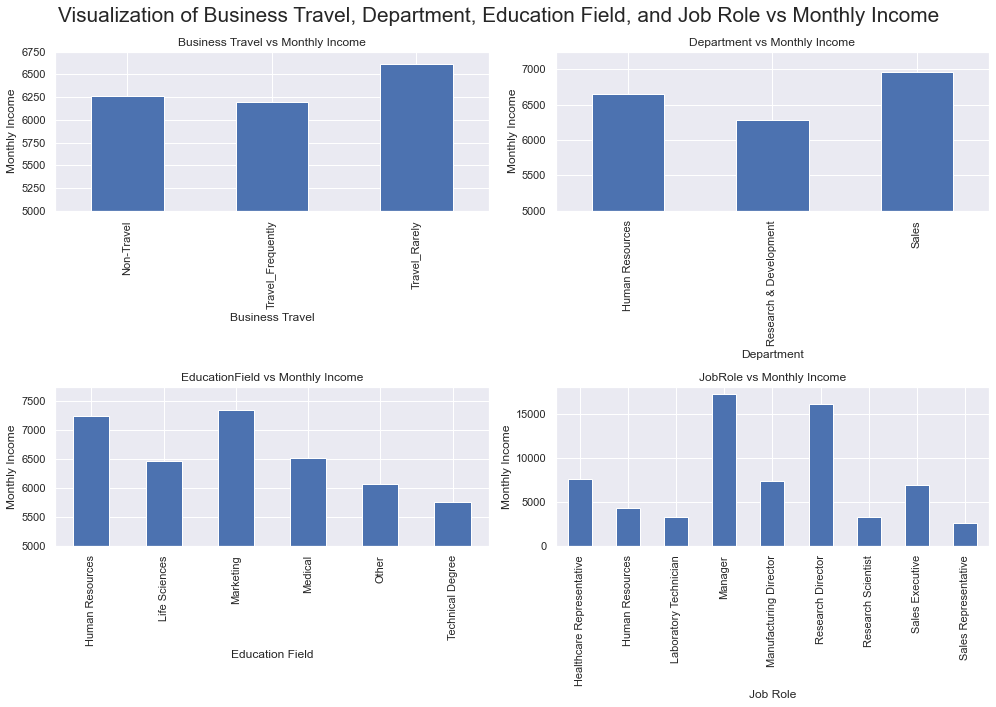

In [456]:
# Average income based on Business Travel, Department, Education Field, and Job Role

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (14,10))

df.groupby('BusinessTravel', as_index=False).agg({'MonthlyIncome': ['mean']}).plot(x= 'BusinessTravel', y = ('MonthlyIncome', 'mean'), kind = 'bar', legend = False, ax = ax1)
ax1.set_xlabel('Business Travel')
ax1.set_ylabel('Monthly Income')
ax1.set_title('Business Travel vs Monthly Income')
ax1.set_ylim(5000,6750)

df.groupby('Department', as_index=False).agg({'MonthlyIncome': ['mean']}).plot(x= 'Department', y = ('MonthlyIncome', 'mean'), kind = 'bar', legend = False, ax = ax2)
ax2.set_xlabel('Department')
ax2.set_ylabel('Monthly Income')
ax2.set_title('Department vs Monthly Income')
ax2.set_ylim(5000,7250)

df.groupby('EducationField', as_index=False).agg({'MonthlyIncome': ['mean']}).plot(x= 'EducationField', y = ('MonthlyIncome', 'mean'), kind = 'bar', legend = False, ax = ax3)
ax3.set_xlabel('Education Field')
ax3.set_ylabel('Monthly Income')
ax3.set_title('EducationField vs Monthly Income')
ax3.set_ylim(5000,7750)

df.groupby('JobRole', as_index=False).agg({'MonthlyIncome': ['mean']}).plot(x= 'JobRole', y = ('MonthlyIncome', 'mean'), kind = 'bar', legend = False, ax = ax4)
ax4.set_xlabel('Job Role')
ax4.set_ylabel('Monthly Income')
ax4.set_title('JobRole vs Monthly Income')

fig.suptitle('Visualization of Business Travel, Department, Education Field, and Job Role vs Monthly Income', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

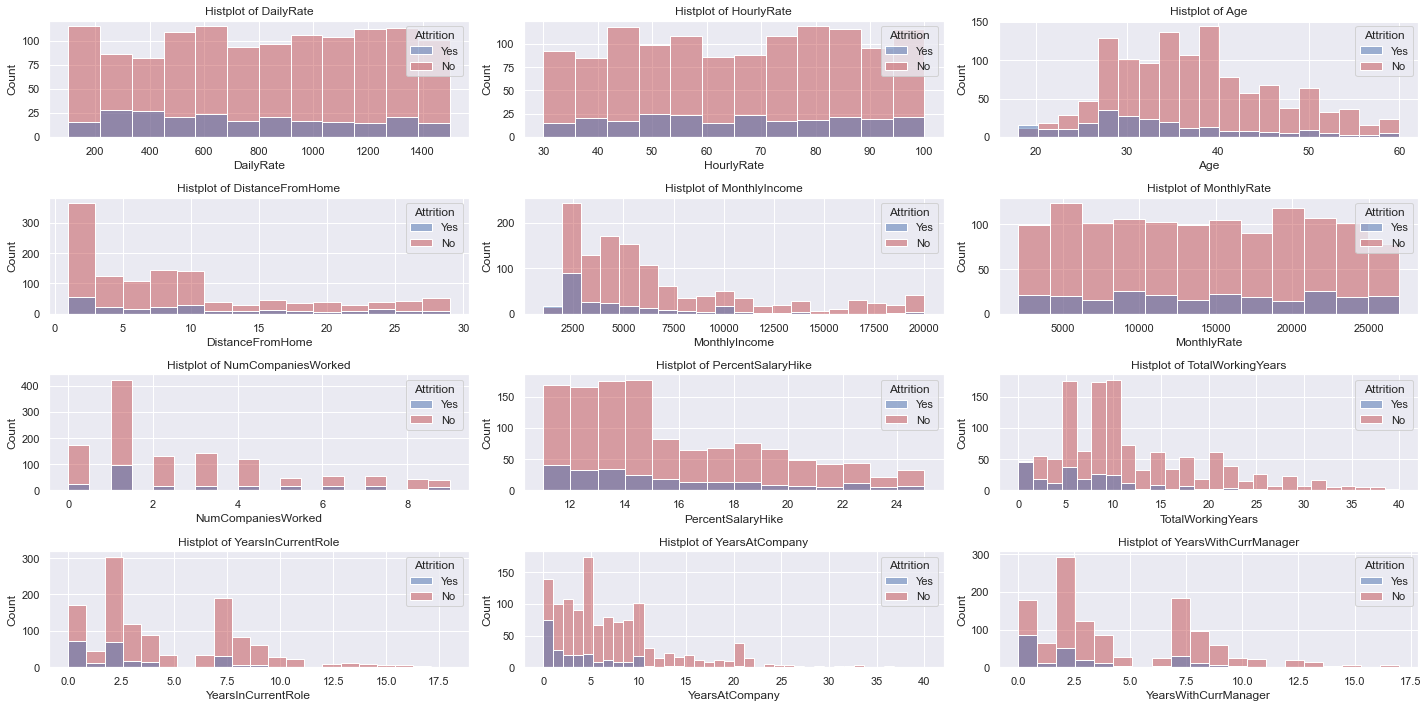

In [457]:
# Correlation between every variable with Attrition

variable = df[['DailyRate','HourlyRate','Age','DistanceFromHome','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','YearsInCurrentRole','YearsAtCompany','YearsWithCurrManager']]

plt.figure(figsize=(20,10))
list_of_column=variable.columns

for i in range(len(list_of_column)):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df,hue = 'Attrition',x = variable[list_of_column[i]], palette=['b', 'r'])
    plt.title('Histplot of {}'.format(list_of_column[i]))
    plt.tight_layout()


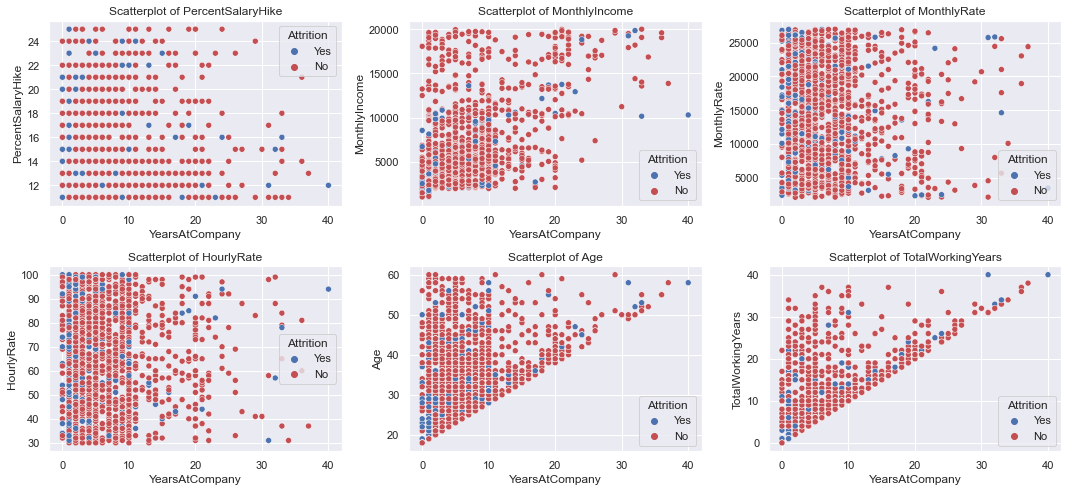

In [458]:
# Correlation between Years at Company and Percent Salary Hike, MonthlyIncome, MonthlyRate, HourlyRate, Age, and TotalWorkingYears

Y = df[['PercentSalaryHike','MonthlyIncome','MonthlyRate','HourlyRate','Age','TotalWorkingYears']]

plt.figure(figsize=(15,7))
list_of_column=Y.columns

for i in range(len(list_of_column)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data=df,hue = 'Attrition',x ='YearsAtCompany' ,y = Y[list_of_column[i]], palette=['b', 'r'])
    plt.title('Scatterplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

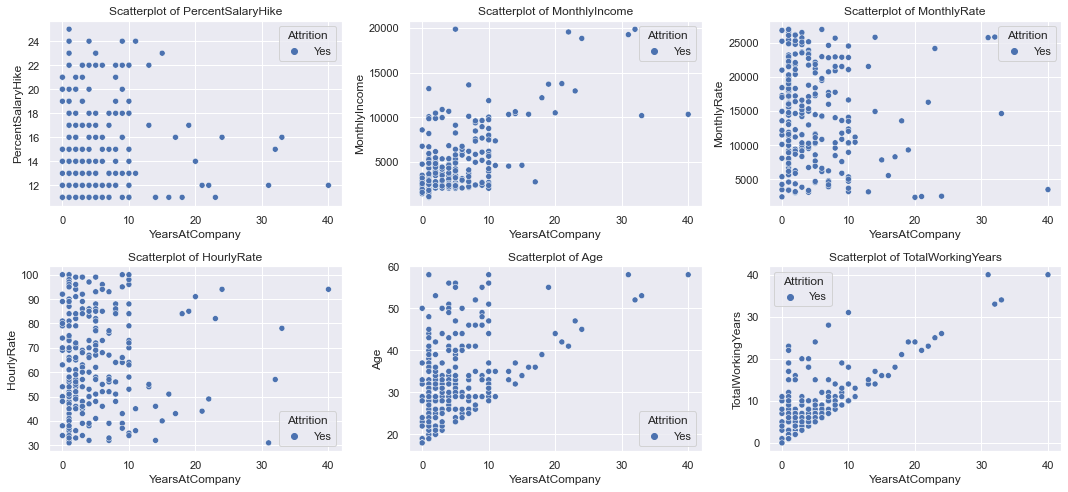

In [459]:
# Correlation between Years at Company and Percent Salary Hike, Monthly Income, Monthly Rate, Hourly Rate, Age, and Total Working Years with the data of Attrition = yes

true_att  = df[df['Attrition']== 'Yes']

plt.figure(figsize=(15,7))
list_of_column=Y.columns

for i in range(len(list_of_column)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(data=true_att,hue = 'Attrition',x ='YearsAtCompany' ,y = Y[list_of_column[i]], palette=['b'])
    plt.title('Scatterplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

## Cleansing Data

In [460]:
df = df.drop(['EmployeeCount','Over18','StandardHours'], axis=1) #drop variable that only has 1 value

In [461]:
# Make yes & no into binary

df['Attrition'] = df['Attrition'].eq('Yes').mul(1)
df['OverTime'] = df['OverTime'].eq('Yes').mul(1)

In [462]:
# See the balance of the binary data
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [463]:
# Menyeimbangkan jumlah 0 dan 1 pada label dengan minority class
from sklearn.utils import resample

#create two different dataframe of majority and minority class 
df_majority = df[(df['Attrition']==0)] 
df_minority = df[(df['Attrition']==1)] 
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 237, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_balance = pd.concat([df_majority_downsampled, df_minority])

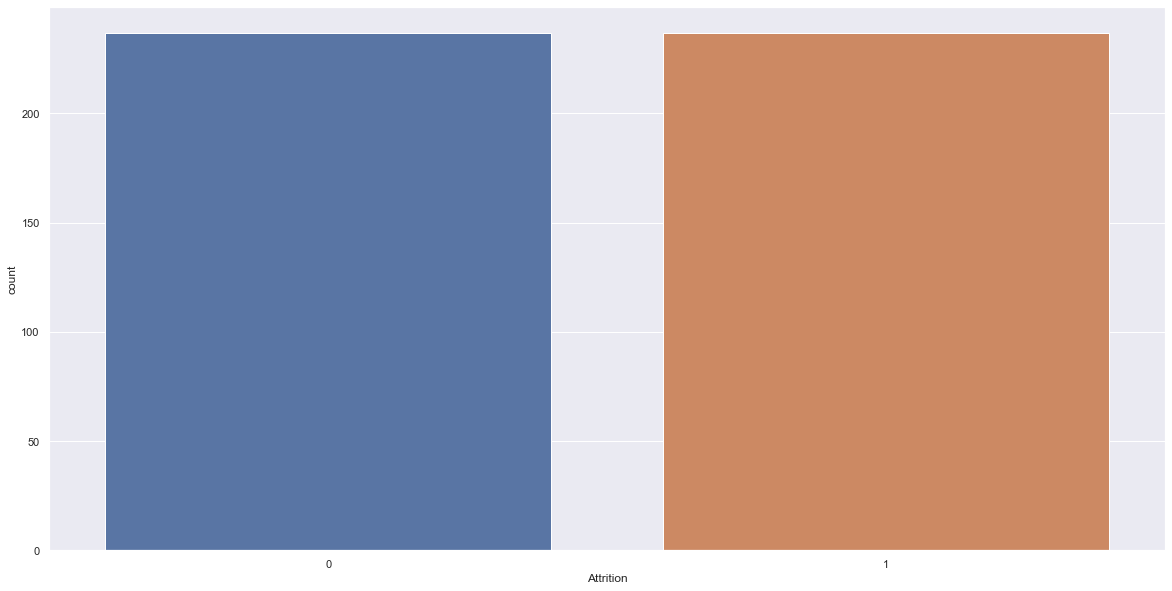

In [464]:
# Check the data after balancing
sns.countplot(df_balance['Attrition'])
plt.show()

## One-Hot Encoding

In [465]:
df_balance = pd.get_dummies(df_balance, columns=['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','PerformanceRating','RelationshipSatisfaction','StockOptionLevel'])
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1349 to 1461
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                474 non-null    int64
 1   Attrition                          474 non-null    int32
 2   DailyRate                          474 non-null    int64
 3   DistanceFromHome                   474 non-null    int64
 4   EmployeeNumber                     474 non-null    int64
 5   HourlyRate                         474 non-null    int64
 6   MonthlyIncome                      474 non-null    int64
 7   MonthlyRate                        474 non-null    int64
 8   NumCompaniesWorked                 474 non-null    int64
 9   OverTime                           474 non-null    int32
 10  PercentSalaryHike                  474 non-null    int64
 11  TotalWorkingYears                  474 non-null    int64
 12  TrainingTimesLastY

## Split Data

In [466]:
X = df_balance.loc[ :, df_balance.columns != 'Attrition']
y = df_balance['Attrition']

In [467]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=1)

In [468]:
# Melihat dimensi dari data yang digunakan untuk pemodelan
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(284, 75)
(284,)
(190, 75)
(190,)


## Modelling

In [469]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
dtree = tree.DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
knn = KNeighborsClassifier()

In [470]:
models = [lr,dtree,rf,knn]
name_models = ('Logistic Regression','Decision Tree', 'Random Forest Classifier', 'Knearest Neighbor')
pred = [ ]

In [471]:
# Accuracy
from sklearn.metrics import accuracy_score

for i in range(len(models)):
    models[i].fit(X_train, y_train)
    pred_train = models[i].predict(X_train)
    pred_val = models[i].predict(X_test)
    print(name_models[i])
    accuracy_train = (accuracy_score(y_train, pred_train))
    accuracy_val = (accuracy_score(y_test, pred_val))
    print('Accuracy Train: ',accuracy_train)
    print('Accuracy Validation: ',accuracy_val)
    print(' ')

Logistic Regression
Accuracy Train:  0.6161971830985915
Accuracy Validation:  0.6684210526315789
 
Decision Tree
Accuracy Train:  1.0
Accuracy Validation:  0.6631578947368421
 
Random Forest Classifier
Accuracy Train:  1.0
Accuracy Validation:  0.6842105263157895
 
Knearest Neighbor
Accuracy Train:  0.7007042253521126
Accuracy Validation:  0.5789473684210527
 


## Hyperparameter Tuning

In [472]:
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [473]:
grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"] # l1 lasso l2 ridge
}

In [474]:
lr_cv=GridSearchCV(estimator=lr,
                    param_grid=grid,
                    cv=10)
lr_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [475]:
lr_HT = lr_cv.best_estimator_
lr_HT.fit(X_train,y_train)
lr_best = lr_HT.predict(X_test)

print('Mean Best Accuracy: ', lr_cv.best_score_)
print('Best Accuracy: ',(accuracy_score(y_test, lr_best)))

Mean Best Accuracy:  0.6226600985221674
Best Accuracy:  0.6736842105263158


### Decision Tree

In [476]:
params = {
        'max_leaf_nodes': list(range(2, 100)), 
        'min_samples_split': [2, 3, 4]
}

In [477]:
DT_cv = GridSearchCV(estimator=dtree, 
                    param_grid=params, 
                    verbose=1, cv=3)
DT_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [478]:
tree_HT = DT_cv.best_estimator_
tree_HT.fit(X_train, y_train)
tree_best = tree_HT.predict(X_test)

print('Mean Best Accuracy: ', DT_cv.best_score_)
print('Best Accuracy: ',(accuracy_score(y_test, tree_best)))

Mean Best Accuracy:  0.6585666293393057
Best Accuracy:  0.6736842105263158


### Random Forest

In [479]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [480]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [481]:
rf_HT = grid_search.best_estimator_
rf_HT.fit(X_train, y_train)
rf_best = rf_HT.predict(X_test)

print('Mean Best Accuracy: ', grid_search.best_score_)
print('Best Accuracy: ',(accuracy_score(y_test, rf_best)))

Mean Best Accuracy:  0.7323943661971831
Best Accuracy:  0.7052631578947368


### Knearest Neighbor

In [482]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [483]:
grid = GridSearchCV(estimator=knn, 
                    param_grid=param_grid, 
                    cv=10, scoring='accuracy', 
                    return_train_score=False,verbose=1)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [484]:
knn_HT = grid.best_estimator_
knn_HT.fit(X_train,y_train)
knn_best = knn_HT.predict(X_test)

print('Mean Best Accuracy: ', grid.best_score_)
print('Best Accuracy: ',(accuracy_score(y_test, knn_best)))

Mean Best Accuracy:  0.5701970443349753
Best Accuracy:  0.5789473684210527


## Evaluation

In [485]:
ht = [lr_best,tree_best,rf_best,knn_best]
name_models = ('Logistic Regression','Decision Tree', 'Random Forest Classifier', 'Knearest Neighbor')

### Accuracy

In [486]:
for i in range(len(ht)):
    print('Accuracy of {}'.format(name_models[i]))
    print((accuracy_score(y_test,ht[i])))
    print(' ')

Accuracy of Logistic Regression
0.6736842105263158
 
Accuracy of Decision Tree
0.6736842105263158
 
Accuracy of Random Forest Classifier
0.7052631578947368
 
Accuracy of Knearest Neighbor
0.5789473684210527
 


### Precision

In [487]:
from sklearn.metrics import precision_score


for i in range(len(ht)):
    print('Precision {}'.format(name_models[i]))
    print((precision_score(y_test,ht[i],average='macro')))
    print(' ')

Precision Logistic Regression
0.674204633632635
 
Precision Decision Tree
0.6807112923320875
 
Precision Random Forest Classifier
0.7057975834164727
 
Precision Knearest Neighbor
0.5799755799755799
 


### Recall Score

In [493]:
from sklearn.metrics import recall_score


for i in range(len(ht)):
    print('Recall Score of {}'.format(name_models[i]))
    print((recall_score(y_test,ht[i],average='macro')))
    print(' ')

Recall Score of Logistic Regression
0.6744366744366744
 
Recall Score of Decision Tree
0.6771006771006771
 
Recall Score of Random Forest Classifier
0.7060717060717061
 
Recall Score of Knearest Neighbor
0.5799755799755799
 


### Confusion Matrix

In [489]:
from sklearn.metrics import confusion_matrix


for i in range(len(ht)):
    print('Confusion Matrix of {}'.format(name_models[i]))
    print((confusion_matrix(y_test,ht[i])))
    print(' ')

Confusion Matrix of Logistic Regression
[[63 28]
 [34 65]]
 
Confusion Matrix of Decision Tree
[[69 22]
 [40 59]]
 
Confusion Matrix of Random Forest Classifier
[[66 25]
 [31 68]]
 
Confusion Matrix of Knearest Neighbor
[[55 36]
 [44 55]]
 


### ROC Curve

In [490]:
from sklearn.metrics import roc_curve, auc

for i in range(len(ht)):
    print('ROC Curve of {}'.format(name_models[i]))
    fpr,tpr,thresholds = (roc_curve(y_test,ht[i]))
    print(auc(fpr,tpr))
    print(' ')

ROC Curve of Logistic Regression
0.6744366744366744
 
ROC Curve of Decision Tree
0.6771006771006771
 
ROC Curve of Random Forest Classifier
0.706071706071706
 
ROC Curve of Knearest Neighbor
0.57997557997558
 


In [492]:
from sklearn.metrics import classification_report


for i in range(len(ht)):
    print('Classification Report {}'.format(name_models[i]))
    print((classification_report(y_test,ht[i])))
    print(' ')

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        91
           1       0.70      0.66      0.68        99

    accuracy                           0.67       190
   macro avg       0.67      0.67      0.67       190
weighted avg       0.68      0.67      0.67       190

 
Classification Report Decision Tree
              precision    recall  f1-score   support

           0       0.63      0.76      0.69        91
           1       0.73      0.60      0.66        99

    accuracy                           0.67       190
   macro avg       0.68      0.68      0.67       190
weighted avg       0.68      0.67      0.67       190

 
Classification Report Random Forest Classifier
              precision    recall  f1-score   support

           0       0.68      0.73      0.70        91
           1       0.73      0.69      0.71        99

    accuracy                           0.71       190